# Coursework 2: Neural Networks 

This coursework covers the topics covered in class regarding neural networks for image classification.

This coursework includes both coding questions as well as written ones. Please upload the notebook, which contains your code, results and answers as a pdf file onto Cate.

Dependencies: If you work on a college computer in the Computing Lab, where Ubuntu 18.04 is installed by default, you can use the following virtual environment for your work, where relevant Python packages are already installed.

`source /vol/bitbucket/wbai/virt/computer_vision_ubuntu18.04/bin/activate`

Alternatively, you can use pip, pip3 or anaconda etc to install Python packages.

**Note:** please read the both the text and code comment in this notebook to get an idea what you are supposed to implement.

**Note 2** If you are using the virtual environment please run the following command before importing tensorflow

`export LD_LIBRARY_PATH=/vol/cuda/9.0.176/lib64/:"${LD_LIBRARY_PATH}}"` 

In [1]:
# Import libraries
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


## Question 1 (20 points)

Throughout this coursework you will be working with the Fashion-MNIST dataset. If you are interested, you may find relevant information regarding the dataset in this paper.

[1] Fashion-MNIST: A novel image dataset for benchmarking machine learning algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. [arXiv:1708.07747](https://arxiv.org/abs/1708.07747)

Be sure that you have the following files in your working directory: data.tar.gz and reader.py. Loading the data can be done as follows:

`from reader import get_images
(x_train, y_train), (x_test, y_test) = get_images()`

The dataset is already split into a set of 60,000 training images and a set of 10,000 test images. The images are of size 28x28 pixels and stored as 784-D vector. So if you would like to visualise the images, you need to reshape the array.

There are in total 10 label classes, which are:
* 0: T-shirt/top
* 1: Trousers
* 2: Pullover
* 3: Dress
* 4: Coat
* 5: Sandal
* 6: Shirt
* 7: Sneaker
* 8: Bag
* 9: Ankle boot

### 1.1 Load data (6 points)
Load the dataset and print the dimensions of the training set and the test set.

In [2]:
from reader import get_images
(x_train, y_train), (x_test, y_test) = get_images()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


/homes/sc6918/computer_vision/cw2/cv_cw2/reader.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  x_train = df_train.drop('label', axis=1).as_matrix().astype(np.uint8)
/homes/sc6918/computer_vision/cw2/cv_cw2/reader.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_train = df_train['label'].as_matrix().astype(np.uint8)
/homes/sc6918/computer_vision/cw2/cv_cw2/reader.py:40: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  x_test = df_test.drop('label', axis=1).as_matrix().astype(np.uint8)
/homes/sc6918/computer_vision/cw2/cv_cw2/reader.py:41: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_test = df_test['label'].as_matrix().astype(np.uint8)


### 1.2 Visualize data (6 points)
Visualise 3 training images (T-shirt, trousers and pullover) and 3 test images (dress, coat and sandal).

<Figure size 432x288 with 0 Axes>

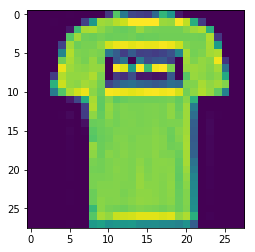

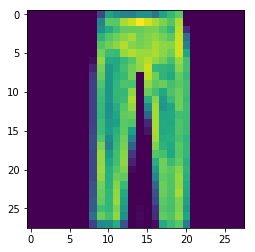

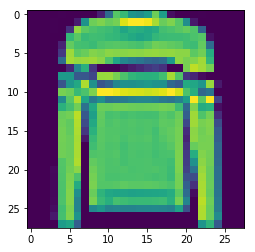

<Figure size 432x288 with 0 Axes>

In [3]:
n_tshirt=np.argwhere(y_train==0)[0]
n_trousers=np.argwhere(y_train==1)[0]
n_pullover=np.argwhere(y_train==2)[0]

img_tshirt = x_train[n_tshirt]
plt.imshow(np.reshape(img_tshirt,(28,28)))
plt.figure()
img_trousers = x_train[n_trousers]
plt.imshow(np.reshape(img_trousers,(28,28)))
plt.figure()
img_pullover = x_train[n_pullover]
plt.imshow(np.reshape(img_pullover,(28,28)))
plt.figure()

### 1.3 Data balance (4 points)
Print out the number of training samples for each class.

Text(0.5, 1.0, 'Histogram of class balance')

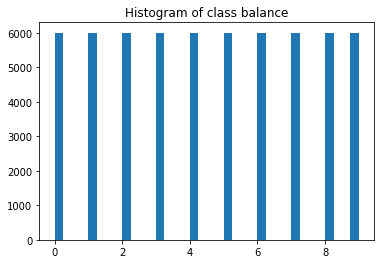

In [4]:
plt.hist(y_train, bins='auto')
plt.title("Histogram of class balance")

### 1.4 Discussion (4 points)
Is the dataset balanced? What would happen if the dataset is not balanced in the context of image classification? 

yes, the dataset is perfectly balanced, if the data is not balanced, the algorithm will prefer to give output in favor of the majority class as it has more probability of getting correct by guessing in favor of the majority class. This will prevent the minority class from being predicted, and sometimes neglected.

## Question 2 (40 points)

Build a neural network and train it with the Fashion-MNIST dataset. Here, we use the keras library, which is a high-level neural network library built upon tensorflow.

In [5]:
# Convert the label class into a one-hot representation
from keras.layers.convolutional import Conv2D
from keras.layers import Flatten, Dense, Reshape, MaxPool2D, Input, Activation, Dropout, BatchNormalization
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
x_train.shape

(60000, 784)

### 2.1 Build a multi-layer perceptron, also known as multi-layer fully connected network. You need to define the number of classes, the layers, the loss function, the optimiser and evaluation metric. (30 points)

In [7]:
model = keras.models.Sequential()
model.add(Dense(784,input_dim = 784))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(10))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
activation_1 (Activation)    (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
__________

### 2.2 Define the optimisation parameters including the batch size and the number of epochs and then run the optimiser. (10 points)

We have tested that for an appropriate network architecture, on a personal laptop and with only CPU, it takes about a few seconds per epoch to train the network. For 100 epochs, it takes about a coffee break's time to finish the training. If you run it on a powerful GPU, it would be even much faster.

In [8]:
batch_size = 4096
epochs = 100
model.fit(x=x_train,y=y_train,batch_size=batch_size,epochs=epochs,validation_split=0.05)

Train on 57000 samples, validate on 3000 samples
Epoch 1/100
57000/57000 [==============================] - 10s 180us/step - loss: 2.1819 - acc: 0.1572 - val_loss: 1.8106 - val_acc: 0.3350
Epoch 2/100
57000/57000 [==============================] - 5s 96us/step - loss: 1.8666 - acc: 0.2873 - val_loss: 1.4635 - val_acc: 0.5450
Epoch 3/100
57000/57000 [==============================] - 5s 96us/step - loss: 1.5396 - acc: 0.3969 - val_loss: 1.0881 - val_acc: 0.5527
Epoch 4/100
57000/57000 [==============================] - 5s 96us/step - loss: 1.3136 - acc: 0.4728 - val_loss: 0.9129 - val_acc: 0.6423
Epoch 5/100
57000/57000 [==============================] - 6s 97us/step - loss: 1.1390 - acc: 0.5269 - val_loss: 0.8138 - val_acc: 0.6557
Epoch 6/100
57000/57000 [==============================] - 6s 97us/step - loss: 1.0114 - acc: 0.5806 - val_loss: 0.7382 - val_acc: 0.6653
Epoch 7/100
57000/57000 [==============================] - 5s 95us/step - loss: 0.9191 - acc: 0.6222 - val_loss: 0.7807 -

57000/57000 [==============================] - 5s 96us/step - loss: 0.2311 - acc: 0.9349 - val_loss: 0.6054 - val_acc: 0.8690
Epoch 60/100
57000/57000 [==============================] - 5s 96us/step - loss: 0.2273 - acc: 0.9355 - val_loss: 0.6027 - val_acc: 0.8757
Epoch 61/100
57000/57000 [==============================] - 5s 96us/step - loss: 0.2398 - acc: 0.9332 - val_loss: 0.6816 - val_acc: 0.8533
Epoch 62/100
57000/57000 [==============================] - 5s 96us/step - loss: 0.3021 - acc: 0.9165 - val_loss: 0.8468 - val_acc: 0.8030
Epoch 63/100
57000/57000 [==============================] - 5s 96us/step - loss: 0.3228 - acc: 0.9074 - val_loss: 0.8931 - val_acc: 0.7860
Epoch 64/100
57000/57000 [==============================] - 6s 97us/step - loss: 0.2878 - acc: 0.9186 - val_loss: 0.5981 - val_acc: 0.8543
Epoch 65/100
57000/57000 [==============================] - 6s 97us/step - loss: 0.2785 - acc: 0.9192 - val_loss: 0.5629 - val_acc: 0.8563
Epoch 66/100
57000/57000 [==============

## Question 3 (20 points) 

Evaluate the performance of your network with the test data. 
Visualize the performance using appropriate metrics and graphs (eg. confusion matrix). 
Comment on your per class performance and how it could be better.

In [9]:
import itertools

# This function is provided for you to display the confusion matrix.
# For more information about the confusion matrix, you can read at
# https://en.wikipedia.org/wiki/Confusion_matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
        This function prints and plots the confusion matrix.
        
        cm: confusion matrix
        classes: a list of the class labels or class names
        normalize: normalize the matrix so that each row amounts to one
        cmap: color map
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### 3.1 Evaluate the classification accuracy on the test set (10 points)

In [10]:
model.evaluate(x=x_test,y=y_test)

10000/10000 [==============================] - 1s 81us/step


[0.6537270777642726, 0.8801]

### 3.2 Calculate and plot the confusion matrix (10 points)

Confusion matrix, without normalization
[[851   1  16  15   0   0 133   0   4   0]
 [  0 959   0   3   0   0   0   0   0   0]
 [  4   0 748   1  69   0  45   0   1   0]
 [ 31  35  12 917  51   1  39   0   7   0]
 [  4   1 120  27 804   0  65   0   9   0]
 [  1   0   1   0   1 964   1  15   2  12]
 [104   3 102  35  74   0 714   0  26   1]
 [  1   0   1   0   0  21   0 975   9  60]
 [  4   1   0   2   1   1   3   0 942   0]
 [  0   0   0   0   0  13   0  10   0 927]]


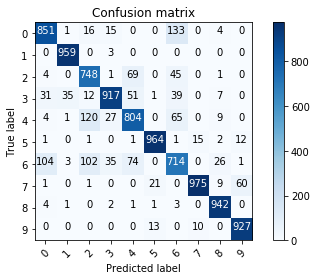

In [11]:
y_pred = model.predict(x_test)
confusion_mat = np.zeros([10,10])

for pred,true in zip(y_pred,y_test):
    confusion_mat[pred.argmax(axis=0),true.argmax(axis=0)] += 1
    
plot_confusion_matrix(confusion_mat.astype(int),[0,1,2,3,4,5,6,7,8,9])

## 3.3 Comment on the per class performance and how it could be better

Overall, the model can perform quite well in the test dataset. Although the model struggle with class 6 and 2 the most. The confusion matrix shows that the model has high rate of misclassifying a class 4 (coat) as a class 2 (pull-over), class 6 (shirt) as a class 0 (T-shirt), and class 0 (T-shirt) as a class 6 (shirt). The model could be better of the model can distinguish these hard-to-classify classes better. There are several ways of doing so:

1. Increase the number of training samples.
2. For classes that have high error rate, we can train the model after it has been trained with the dataset with data that the model has misclassified as in boosting.
3. Change the architecture of the model to be mor eaccurate in distinguishing these classes

Other general methods are noted in question 4.3

## Question 4 (20 points)
Take two photos, one of your clothes or shoes that belongs to one of 10 classes, the other that does not belong to any class.

Use either Python or other software (Photoshop, Gimp, or any image editer) to convert the photos into grayscale, crop the region of interest and reshape into the size of 28x28.

### 4.1 Load and visualise your own images (6 points)

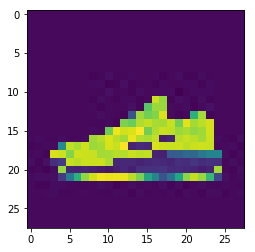

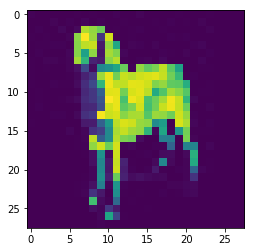

In [12]:
import cv2
img_shoe = cv2.imread('shoe_test.jpg',0)
plt.imshow(img_shoe)
x_shoe = np.expand_dims(img_shoe.flatten(),axis=1).transpose()

plt.figure()
img_derp = cv2.imread('derp_test.jpg',0)
plt.imshow(img_derp)
x_derp = np.expand_dims(img_derp.flatten(),axis=1).transpose()

In [13]:
x_shoe.shape

(1, 784)

### 4.2 Test your network on the two images and show the classification results (10 points)

In [14]:
y_shoe = model.predict(x=x_shoe)
pred_shoe = y_shoe.argmax(axis=1)
print(y_shoe)
print("predicted class for sneaker=",pred_shoe)

print('')

y_derp = model.predict(x=x_derp)
pred_derp = y_derp.argmax(axis=1)
print(y_derp)
print("predicted class for irrelevant image=",pred_derp)

[[2.0285325e-09 1.1428693e-13 5.6311794e-19 3.8038607e-13 2.1171403e-27
  9.9999988e-01 7.1542289e-17 1.4009956e-07 2.0053141e-15 1.1486524e-08]]
predicted class for sneaker= [5]

[[2.01141932e-14 2.13652740e-32 2.33426280e-02 5.30470132e-26
  1.46517944e-08 0.00000000e+00 6.87916815e-01 0.00000000e+00
  2.88740575e-01 2.81394569e-32]]
predicted class for irrelevant image= [6]


### 4.3 Discuss the classification results and provide one method to improve real life performance of the network (4 points)

The model perform well under the training data and the testing data, this is reflected from the confusion matrix where the model shows high values on the diagonal of the confusion matrix, meaning that the model can distinguish an image from a certain class, along side with low off-diagonal values meaning that the model have low probability of misclassifying an image into a wrong class. However, the model turns out to be unable to predict the image from the internet as it shows that it predicted an external image in the sneaker class (class 7) as a sandal (class 5) with the probability of 0.99 as shown by the softmax function. The model also displayed high confidence in predicting an external irrelevant image of a dog as a shirt (class 6) with the probability of 0.69, which in theory, it should have low probability of each class distributed into each class. I think the root cause of the problem is overfitting, since the training accuracy of the model after the 100th epoch is 95%, while the validation acucracy of the model is only at 88%.

There are various ways that can be used to improve the model, which are as follow:
1. Change the model architecture  into convolutional neural network. Instead of assigning a weight to each pixel, convolutional neural networks uses kernel to process the data, therefore the same weights are applied into different region of the image, this provides robustness to translation of the image as well as allowing the model to have less parameters, enabling deeper networks that can learn more abstractions from the image.
2. Apply image augmentation to the dataset to enhance robustness of the model against rotation, translation, scaling, exposure, and image flipping.
3. If the model is to be used to classify irrelevant images too, irrelevant images should also be used to train the model and the model should output 11 classes where the 11th class corresponds to irrelevant images
4. Increase the number of training and testing data of the model to allow more complicated models which will be able to perform better than the current model.
5. Train multiple models and use them together to predict the class of an image which is the concept of ensemble learning.
6. Instead of training for 100 epoch, it will be better to use a callback function to monitor the validation loss and terminate the training process when the validation accuracy is no longer improved.
7. Try out more neural network architectures and then select the best one for the task. 
8. For classes that have high error rate, such as class 6, judging from the confusion matrix, we can train the model after it has been trained with the dataset with data that the model has misclassified as in boosting.

## 5. Survey
How long did the coursework take you to solve? 

3 hours